# Network Tradeoffs: Cost vs Speed vs Reliability

This notebook demonstrates **tradeoffs** in network decisions - you cannot optimize cost, speed, and reliability simultaneously.

Understanding network tradeoffs is essential because:
- **Network decisions involve multiple competing objectives** - cost, speed, reliability often conflict
- **You cannot optimize all three simultaneously** - improving one worsens others
- **There is no single "best" solution** - the best solution depends on your priorities
- **Understanding tradeoffs** helps you make informed network decisions


## Key Concepts

**Tradeoffs** occur when objectives conflict:
- **Cost**: Minimize transportation, infrastructure, or operational costs
- **Speed**: Minimize delivery time, latency, or processing time
- **Reliability**: Maximize probability of successful delivery, uptime, or availability

**The Tradeoff Triangle**:
- You cannot optimize all three simultaneously
- Moving toward one vertex moves away from others
- Faster routes cost more; more reliable routes may be slower; cheaper routes may be less reliable

**No Single "Best" Solution**:
- Different solutions optimize different objectives
- The "best" solution depends on your priorities
- Network models provide recommendations based on specified objectives

**Critical insight**: Understanding tradeoffs helps you make informed decisions about which objectives to prioritize and what you're willing to sacrifice.


## Scenario: Shipping Route Selection

A company must choose shipping routes for products. Different routes have different characteristics:

**Route Options**:
- **Route A (Air Freight)**: Fast (2 days), Reliable (99%), Expensive ($5/unit)
- **Route B (Ground Freight)**: Moderate (5 days), Moderate (95%), Moderate ($1/unit)
- **Route C (Sea Freight)**: Slow (20 days), Less Reliable (85%), Cheap ($0.50/unit)

**The Challenge**:
- Company wants to minimize cost, minimize time, and maximize reliability
- These objectives conflict - cannot optimize all three
- Must choose which objective to prioritize

**The Question**: Which route should the company choose? How do tradeoffs affect the decision?


## Step 1: Install Required Packages (Colab)


In [1]:
%pip install matplotlib numpy pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10


## Step 3: Define Route Options with Tradeoffs

Let's create data for different shipping routes showing the tradeoffs:


In [3]:
# Route characteristics
routes_data = {
    'Route A (Air)': {
        'cost_per_unit': 5.00,
        'time_days': 2,
        'reliability_pct': 99,
        'description': 'Fast, reliable, expensive'
    },
    'Route B (Ground)': {
        'cost_per_unit': 1.00,
        'time_days': 5,
        'reliability_pct': 95,
        'description': 'Moderate on all dimensions'
    },
    'Route C (Sea)': {
        'cost_per_unit': 0.50,
        'time_days': 20,
        'reliability_pct': 85,
        'description': 'Slow, less reliable, cheap'
    }
}

# Create DataFrame
routes_df = pd.DataFrame(routes_data).T
routes_df.index.name = 'Route'
print("SHIPPING ROUTE OPTIONS:")
print("=" * 70)
display(routes_df)

print("\nKey Observations:")
print("  • Route A: Best speed and reliability, worst cost")
print("  • Route B: Balanced across all dimensions")
print("  • Route C: Best cost, worst speed and reliability")
print("  • Tradeoffs are clear - cannot have best of all three")


SHIPPING ROUTE OPTIONS:


,cost_per_unit,time_days,reliability_pct,description
Route,,,,
Route A (Air),5.0,2,99,"Fast, reliable, expensive"
Route B (Ground),1.0,5,95,Moderate on all dimensions
Route C (Sea),0.5,20,85,"Slow, less reliable, cheap"



Key Observations:
  • Route A: Best speed and reliability, worst cost
  • Route B: Balanced across all dimensions
  • Route C: Best cost, worst speed and reliability
  • Tradeoffs are clear - cannot have best of all three


## Step 4: Visualize the Tradeoff Triangle

The cost-speed-reliability tradeoff can be visualized as a triangle:


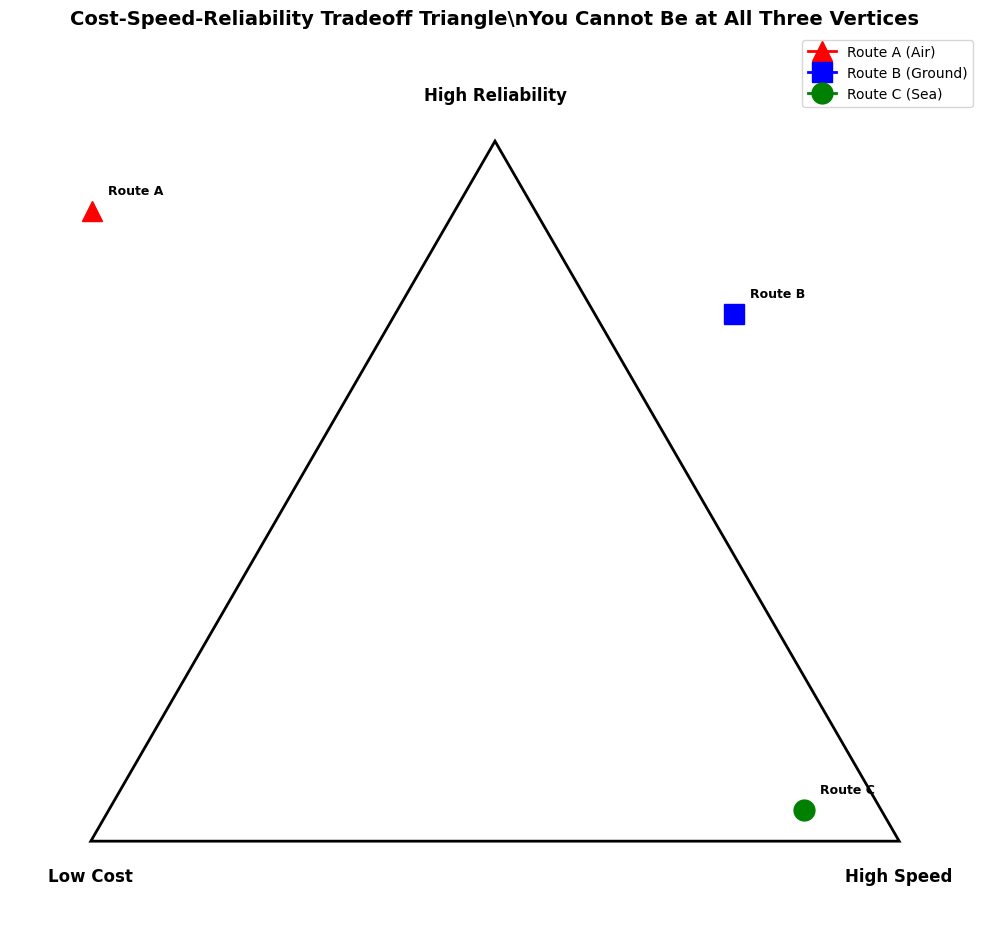

\nKey Insight:
  • Each route occupies a different position in the triangle
  • Route A is near High Speed and High Reliability (but far from Low Cost)
  • Route C is near Low Cost (but far from High Speed and High Reliability)
  • Route B is in the middle (balanced tradeoffs)
  • You must choose which objectives to prioritize


In [4]:
# Normalize values for triangle visualization (0-100 scale)
# Lower is better for cost and time, higher is better for reliability
def normalize_for_triangle(route_data):
    # Normalize cost (invert: lower cost = higher score)
    max_cost = 5.0
    cost_score = (max_cost - route_data['cost_per_unit']) / max_cost * 100
    
    # Normalize time (invert: lower time = higher score)
    max_time = 20
    time_score = (max_time - route_data['time_days']) / max_time * 100
    
    # Reliability is already a percentage
    reliability_score = route_data['reliability_pct']
    
    return cost_score, time_score, reliability_score

# Calculate positions for each route in triangle
fig, ax = plt.subplots(figsize=(10, 10))

# Draw triangle
triangle_points = np.array([
    [0, 0],      # Low Cost vertex
    [100, 0],    # High Speed vertex
    [50, 86.6]   # High Reliability vertex (equilateral triangle)
])

# Draw triangle outline
triangle = plt.Polygon(triangle_points, fill=False, edgecolor='black', linewidth=2)
ax.add_patch(triangle)

# Label vertices
ax.text(0, -5, 'Low Cost', ha='center', fontsize=12, fontweight='bold')
ax.text(100, -5, 'High Speed', ha='center', fontsize=12, fontweight='bold')
ax.text(50, 91.6, 'High Reliability', ha='center', fontsize=12, fontweight='bold')

# Plot routes
colors = {'Route A (Air)': 'red', 'Route B (Ground)': 'blue', 'Route C (Sea)': 'green'}
markers = {'Route A (Air)': '^', 'Route B (Ground)': 's', 'Route C (Sea)': 'o'}

for route_name, route_data in routes_data.items():
    cost_score, time_score, reliability_score = normalize_for_triangle(route_data)
    
    # Convert to triangle coordinates (barycentric to Cartesian)
    # Simplified: use cost and time as x-y, reliability as distance from base
    x = cost_score
    y = time_score * 0.866  # Scale for triangle height
    z_weight = reliability_score / 100
    
    # Adjust position based on reliability (move toward reliability vertex)
    x = x + (50 - x) * (1 - z_weight) * 0.3
    y = y + (86.6 - y) * (1 - z_weight) * 0.3
    
    ax.plot(x, y, marker=markers[route_name], markersize=15, 
           color=colors[route_name], label=route_name, linewidth=2)
    ax.text(x + 2, y + 2, route_name.split('(')[0].strip(), fontsize=9, fontweight='bold')

ax.set_xlim(-10, 110)
ax.set_ylim(-10, 100)
ax.set_aspect('equal')
ax.set_title('Cost-Speed-Reliability Tradeoff Triangle\\nYou Cannot Be at All Three Vertices', 
            fontweight='bold', fontsize=14)
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Each route occupies a different position in the triangle")
print("  • Route A is near High Speed and High Reliability (but far from Low Cost)")
print("  • Route C is near Low Cost (but far from High Speed and High Reliability)")
print("  • Route B is in the middle (balanced tradeoffs)")
print("  • You must choose which objectives to prioritize")


OPTIMIZING FOR DIFFERENT OBJECTIVES


,Route,If Optimize Cost,If Optimize Speed,If Optimize Reliability,Cost,Time,Reliability
0,Route A (Air),,✓ Best,✓ Best,$5.00,2 days,99%
1,Route B (Ground),,,,$1.00,5 days,95%
2,Route C (Sea),✓ Best,,,$0.50,20 days,85%


\n📊 RESULTS:
  • Optimize Cost: Route C (Sea) ($0.50/unit)
    But: 20 days, 85% reliability
  • Optimize Speed: Route A (Air) (2 days)
    But: $5.00/unit, 99% reliability
  • Optimize Reliability: Route A (Air) (99%)
    But: $5.00/unit, 2 days


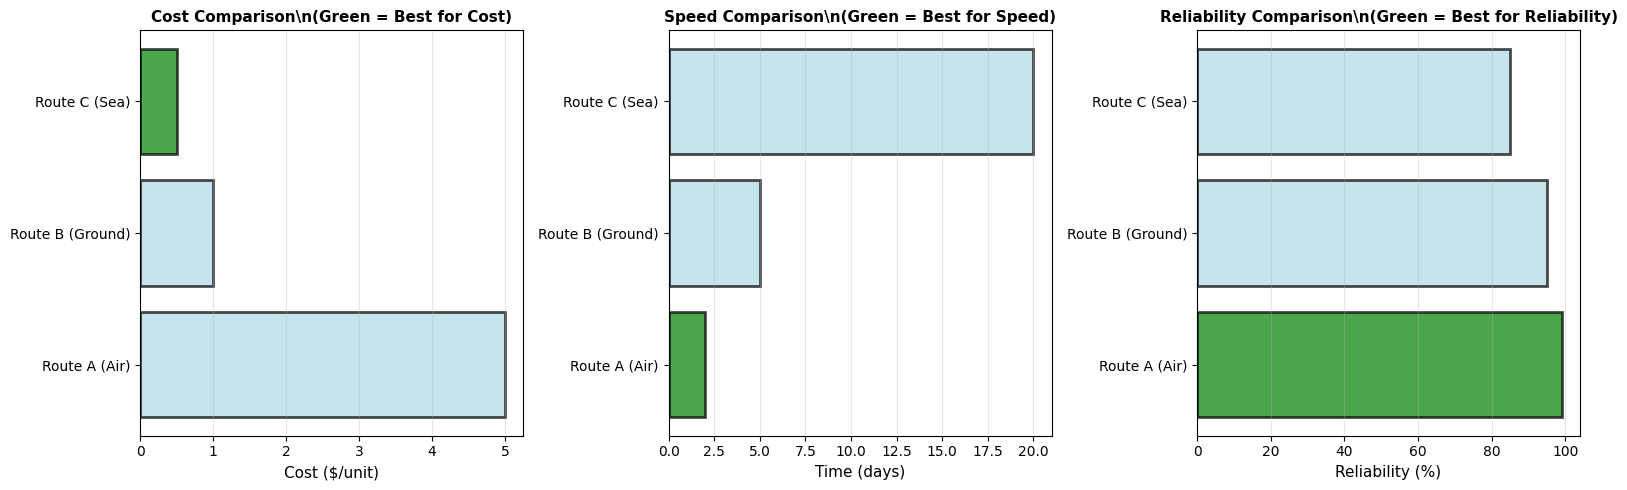

\nKey Insight:
  • Different routes are best for different objectives
  • There is NO single route that is best for all objectives
  • You must choose which objective matters most
  • The 'best' solution depends on your priorities


In [5]:
# Find best route for each objective
best_cost = min(routes_data.items(), key=lambda x: x[1]['cost_per_unit'])
best_speed = min(routes_data.items(), key=lambda x: x[1]['time_days'])
best_reliability = max(routes_data.items(), key=lambda x: x[1]['reliability_pct'])

print("OPTIMIZING FOR DIFFERENT OBJECTIVES")
print("=" * 70)

optimization_results = []

for route_name, route_data in routes_data.items():
    optimization_results.append({
        'Route': route_name,
        'If Optimize Cost': '✓ Best' if route_name == best_cost[0] else '',
        'If Optimize Speed': '✓ Best' if route_name == best_speed[0] else '',
        'If Optimize Reliability': '✓ Best' if route_name == best_reliability[0] else '',
        'Cost': f"${route_data['cost_per_unit']:.2f}",
        'Time': f"{route_data['time_days']} days",
        'Reliability': f"{route_data['reliability_pct']}%"
    })

opt_df = pd.DataFrame(optimization_results)
display(opt_df)

print(f"\\n📊 RESULTS:")
print(f"  • Optimize Cost: {best_cost[0]} (${best_cost[1]['cost_per_unit']:.2f}/unit)")
print(f"    But: {best_cost[1]['time_days']} days, {best_cost[1]['reliability_pct']}% reliability")
print(f"  • Optimize Speed: {best_speed[0]} ({best_speed[1]['time_days']} days)")
print(f"    But: ${best_speed[1]['cost_per_unit']:.2f}/unit, {best_speed[1]['reliability_pct']}% reliability")
print(f"  • Optimize Reliability: {best_reliability[0]} ({best_reliability[1]['reliability_pct']}%)")
print(f"    But: ${best_reliability[1]['cost_per_unit']:.2f}/unit, {best_reliability[1]['time_days']} days")

# Visualize tradeoffs
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

route_names = list(routes_data.keys())
costs = [routes_data[r]['cost_per_unit'] for r in route_names]
times = [routes_data[r]['time_days'] for r in route_names]
reliabilities = [routes_data[r]['reliability_pct'] for r in route_names]

# Plot 1: Cost comparison
colors_plot = ['green' if r == best_cost[0] else 'lightblue' for r in route_names]
axes[0].barh(route_names, costs, color=colors_plot, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_xlabel('Cost ($/unit)', fontsize=11)
axes[0].set_title('Cost Comparison\\n(Green = Best for Cost)', fontweight='bold', fontsize=11)
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Time comparison
colors_plot = ['green' if r == best_speed[0] else 'lightblue' for r in route_names]
axes[1].barh(route_names, times, color=colors_plot, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Time (days)', fontsize=11)
axes[1].set_title('Speed Comparison\\n(Green = Best for Speed)', fontweight='bold', fontsize=11)
axes[1].grid(axis='x', alpha=0.3)

# Plot 3: Reliability comparison
colors_plot = ['green' if r == best_reliability[0] else 'lightblue' for r in route_names]
axes[2].barh(route_names, reliabilities, color=colors_plot, alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_xlabel('Reliability (%)', fontsize=11)
axes[2].set_title('Reliability Comparison\\n(Green = Best for Reliability)', fontweight='bold', fontsize=11)
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nKey Insight:")
print("  • Different routes are best for different objectives")
print("  • There is NO single route that is best for all objectives")
print("  • You must choose which objective matters most")
print("  • The 'best' solution depends on your priorities")
